<a href="https://www.kaggle.com/code/adnanzamanniloy/house-prices-prediction?scriptVersionId=248743975" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [2]:
train_data= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print("Train_data shape:",train_data.shape)
print("Test_data shape:",test_data.shape)
train_data.head()

Train_data shape: (1460, 81)
Test_data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


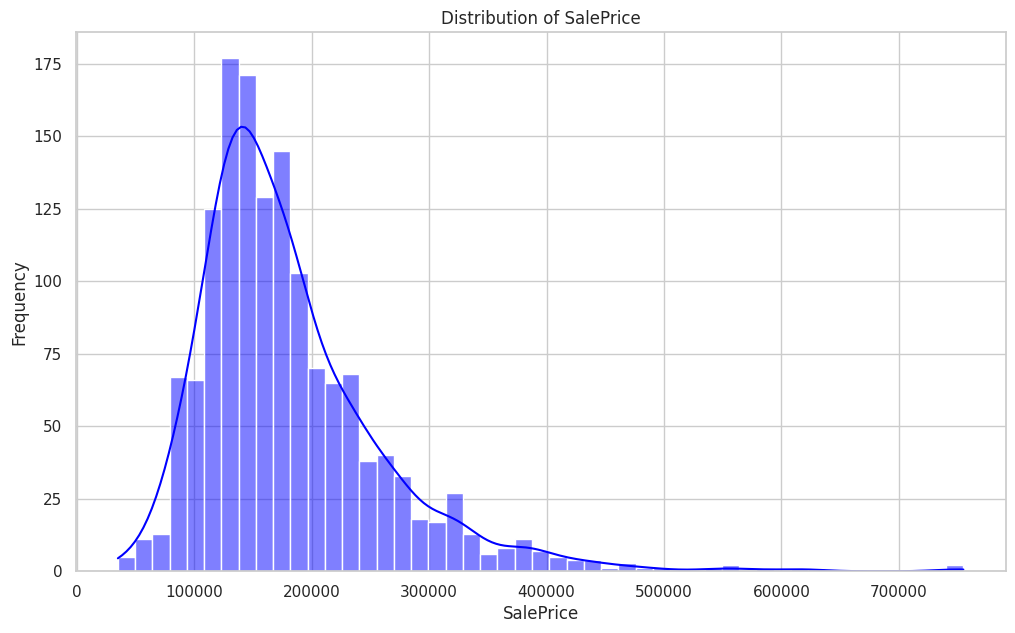

In [4]:
plt.figure(figsize=(12, 7))
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


In [5]:
# Handle missing data
all_data = pd.concat([train_data.drop('SalePrice', axis=1), test_data])
missing = all_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing Values")
print(missing)


Missing Values
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [6]:
#Impute Missing Values
for col in all_data.select_dtypes(include='object').columns:
    all_data[col].fillna('None', inplace=True)
for col in all_data.select_dtypes(exclude='object').columns:
    all_data[col].fillna(all_data[col].median(),inplace=True)


In [7]:
# Feature Engineering
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [8]:
#Label Encode
cols = all_data.select_dtypes(include='object').columns

for x in cols:
    lbl = LabelEncoder()
    all_data[x] = lbl.fit_transform(all_data[x])  


In [9]:
#Feature Scaling
scaler= StandardScaler()
all_data_scaled=scaler.fit_transform(all_data)

In [10]:

X_train = all_data_scaled[:train_data.shape[0]]
X_test = all_data_scaled[train_data.shape[0]:]
y = np.log1p(train_data['SalePrice'])


In [11]:
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

score = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv=5))
print("CV RMSE Score: {:.5f}".format(score.mean()))

model.fit(X_train, y)

CV RMSE Score: 0.12358


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:

prediction=model.predict(X_test)
final_prediction=np.expm1(prediction)


In [13]:

test_ID = test_data['Id']  
test_data = test_data.drop('Id', axis=1)  

submission = pd.DataFrame({
    'Id': test_ID,
    'SalePrice': final_prediction
})
submission.to_csv("submission.csv", index=False)
print("submission.csv created.")



submission.csv created.
